# Ejercicio 02

Repetir el ejemplo con los datos `datasets::trees` de R que proporciona mediciones del diámetro, altura y volumen de madera en 31 cerezos negros talados.

## 0. Import Librerías

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

## 1. Import datos y División de Datos

In [3]:
# Carga de datos 

Arboles = pd.read_csv('./trees_dataset.csv')

Arboles

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7
6,11.0,66,15.6
7,11.0,75,18.2
8,11.1,80,22.6
9,11.2,75,19.9


In [4]:
# División de los Datos en X y Y

size_n = Arboles.shape[0]

DataX = Arboles[['Girth','Height']].to_numpy()
MatrizX = np.concat([np.ones((size_n,1)),DataX],axis=1)

RealValuesY = Arboles[['Volume']].to_numpy()

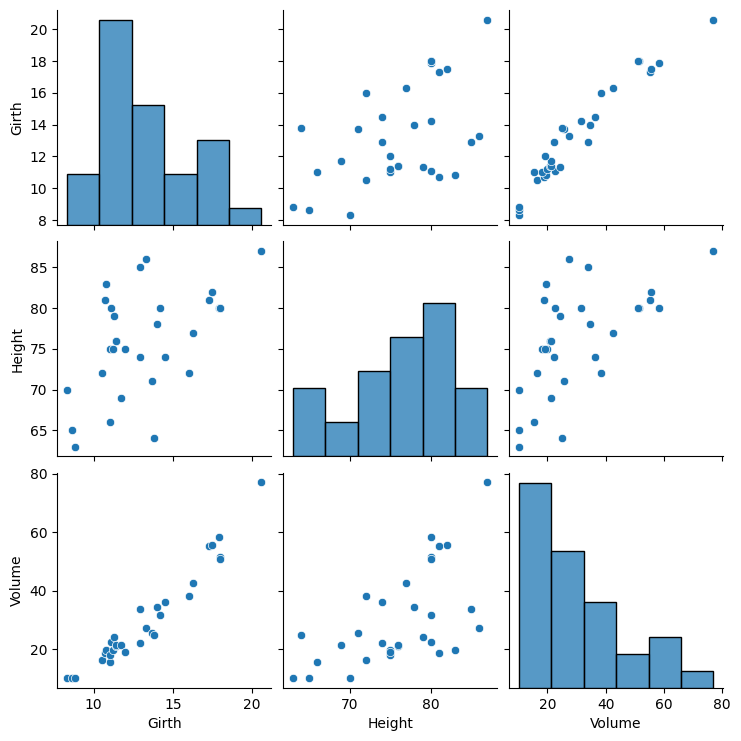

In [5]:
sns.pairplot(Arboles)

## 2. Modelo de Regresión Lineal

### 2.1. Manual

Se realiza el procedimiento vistó en clase ([Actividad 2](../Clases/Actividad_02.ipynb)) para estimar los parámetros del modelo $\beta$.

In [6]:
EstimatorBeta = np.linalg.inv(MatrizX.T@MatrizX) @ MatrizX.T @ RealValuesY

EstimatorBeta

array([[-57.98765892],
       [  4.7081605 ],
       [  0.33925123]])

In [7]:
EstimateY_Manual = MatrizX@EstimatorBeta

### 2.2. Modelo

Se hace uso del modelo implementado en Scikit-Learn para Regresión Lineal ([`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html))

In [8]:
Model = LinearRegression()
Model.fit(MatrizX,RealValuesY)

EstimateY_Model = Model.predict(MatrizX)

# 3. Observaciones contra Estimaciones

Al momento de que se grafican los valores observados y estimados (predichos) permite evaluar de forma gráfica (visual) qué tan bien se ajusta el modelo para predecir el volumen de los cerezos negros talados.

El valor de SSE (`421.9213`) y el $R^2$ score (`0.9479`) permiten medir qué tan bien se ajusta el modelo para predicir los valores y la robustes (confianza de los resultados) de las propias predicciones; aunque los valores indican que la regresión captura la tendencia, se tiene que el SSE es alto debido a que hay árboles, muestras, que se comportan como outliers después de evaluarlos con el modelo.

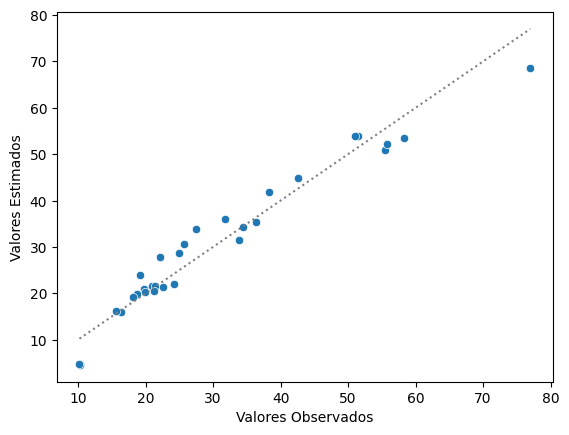

In [9]:
# Plotting de los valores esperados (obsevados) y estimados

fig , axes = plt.subplots()

sns.scatterplot(
    x=RealValuesY[:,0],
    y=EstimateY_Manual[:,0],
    ax=axes,
)

IdentityValues = np.linspace(min(RealValuesY),max(RealValuesY))
sns.lineplot(
    x=IdentityValues[:,0],
    y=IdentityValues[:,0],
    color='gray',
    linestyle=':',
)

axes.set_xlabel('Valores Observados')
axes.set_ylabel('Valores Estimados');

In [10]:
# Calculo de SSE

SSE = (RealValuesY.T@RealValuesY - 2*EstimateY_Manual.T@RealValuesY + EstimateY_Manual.T@EstimateY_Manual)[0,0]

SSE

np.float64(421.9213592224696)

In [11]:
# Estimación de varianza

EstimateSquareSigma = SSE / (size_n - EstimatorBeta.shape[0])

EstimateSquareSigma

np.float64(15.068619972231058)

In [12]:
# R^2 Score de los datos

Model.score(MatrizX,RealValuesY)

0.9479500377816745